<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes/blob/main/Laboratorios/Laboratorio4_Pdi20251.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Nombre de Grupos*: Nosotros

*Integrantes*: Azul Barracchia, Mario Sigal Aguirre, Lautaro Masetto, Leonardo Dominguez

# **Laboratorio 4: Hough y LBP**

❗❗❗❗ ***Recuerden subir la carpeta `imagenes` antes de correr el codigo. Las imagenes se encuentran en la entrega*** ❗❗❗❗

## **Transformada de Hough**

Supongamos que tenemos una linea $f$ dada por
$$ y = xm + b$$
$f$ esta definida por su ***pendiente*** ($m$) y su ***corrimiento*** ($b$), con solo estos dos valores podriamos reconstruir una linea infinita en un plano. La **Transformada de Hough** funciona con un concepto similar, pero sobre otra proyeccion que nos ayudara a tratar lineas verticales, ya que la pendiente de una linea vertial es ∞ y no podriamos definirla de la forma anterior.



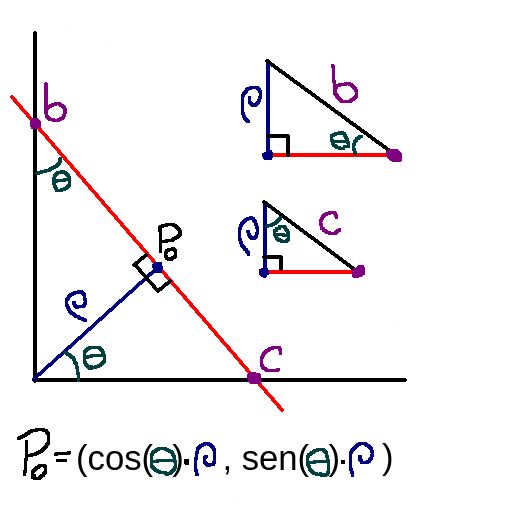

LLamemos $P_0$ al punto de $f$ mas cercano al $(0,0)$, es decir, es la interseccion con una linea perpendicular que pasa por el origen.

Sean $\textbf{θ}$ y $\textbf{ρ}$ las coordenadas polares de $P_0$. Veamos que podremos reescribir $\textbf{b}$ y $\textbf{c}$ (interseccion con el eje $x$) en funcion de $θ$ y $ρ$

$$b= \frac{ρ}{sen(\theta)}$$

$$c= \frac{ρ}{cos(\theta)}$$

Con esto tambien podremos definir $\textbf{m}$

$$m= \frac{Δx}{Δy} = \frac{f(c)-f(0)}{c} = \frac{-b}{c} = -\frac{cos(\theta)}{sen(\theta)}$$


Entonces, podemos reescribir $f$ como

$$y = -x\cdot\frac{cos(\theta)}{sen(\theta)} + \frac{ρ}{sen(\theta)}$$

La cual es una representacion de $f$ que esta definida con $\textbf{θ}$ y $\textbf{ρ}$. De esta forma, sabremos que $f$ sera vertical cuando $\textbf{sen(θ) = 0}$


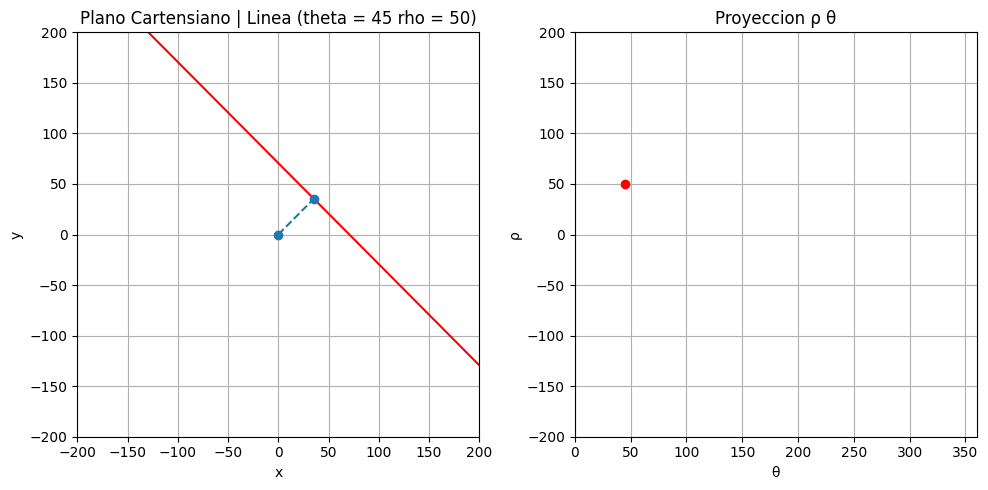

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Proyeccion de la linea en el espacio rho, theta
RHO = 50
THETA = 45  # 45 grados

radTheta = np.radians(THETA)

# calculamos P_0
cosTheta = np.cos(radTheta)
sinTheta = np.sin(radTheta)
x0 = cosTheta * RHO
y0 = sinTheta * RHO

# Verificamos que la linea no sea vertical
# Si no lo es, calculamos su pendiente
if np.isclose(radTheta, 0):
    pendiente = np.inf  # vertical line
else:
    pendiente = -cosTheta / sinTheta

fig, axs = plt.subplots(1,2, figsize=(10, 5))

# Plot Cartesiano

if np.isinf(pendiente):
    # linea vertical
    axs[0].axvline(x=x0, color='r')
else:
    axs[0].axline((x0, y0), slope=pendiente, color='r')

# Linea Perpendicular
axs[0].plot([0,x0],[0,y0], marker='o', linestyle='--')

axs[0].set_xlim(-200, 200)
axs[0].set_ylim(-200, 200)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title(f'Plano Cartensiano | Linea (theta = {THETA} rho = {RHO})')

# Plot Plano Rho Theta
axs[1].plot([THETA],[RHO], marker='o', color='r')
axs[1].set_xlim(0, 360)
axs[1].set_ylim(-200, 200)
axs[1].grid(True)
axs[1].set_xlabel('θ')
axs[1].set_ylabel('ρ')
axs[1].set_title('Proyeccion ρ θ')

plt.tight_layout()
plt.show()

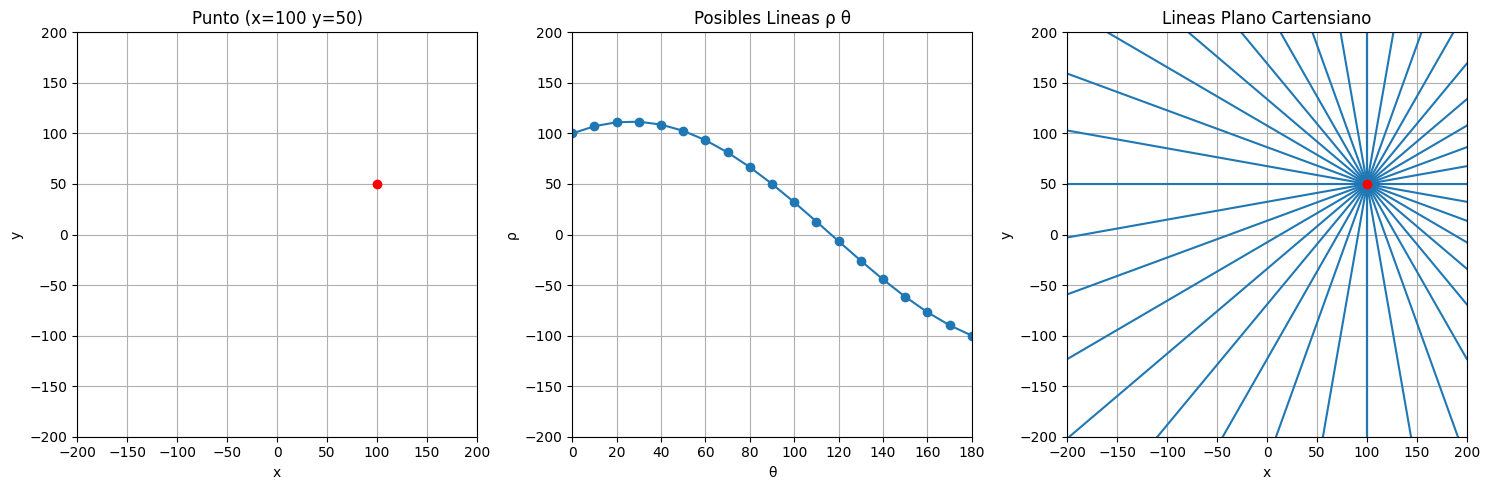

In [ ]:

#Un punto cualquiera en el plano cartesiano
X_PUNTO = 100
Y_PUNTO = 50

# Descubrimos algunas de las lineas a la que podra formar parte el punto
# Solo hasta 180 ya que encontrariamos lineas iguales con rho negativo si no.
thetas = np.arange(0,181,10)
radThetas = np.radians(thetas)

rhos = X_PUNTO * np.cos(radThetas) + Y_PUNTO * np.sin(radThetas)

fig, axs = plt.subplots(1,3, figsize=(15, 5))

# Plot Punto
axs[0].plot([X_PUNTO],[Y_PUNTO], marker='o', color='r')
axs[0].set_xlim(-200, 200)
axs[0].set_ylim(-200, 200)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title(f'Punto (x={X_PUNTO} y={Y_PUNTO})')

# Plot Plano rho theta

axs[1].plot(thetas, rhos, marker='o')
axs[1].set_xlim(0, 180)
axs[1].set_ylim(-200, 200)
axs[1].grid(True)
axs[1].set_xlabel('θ')
axs[1].set_ylabel('ρ')
axs[1].set_title('Posibles Lineas ρ θ')


# Plot posibles lineas
# Pasamos por cada una de los posibles (theta, rho) del punto
for index, _ in np.ndenumerate(thetas):

  cosTheta = np.cos(radThetas[index])
  sinTheta = np.sin(radThetas[index])

  x0 = cosTheta * rhos[index]
  y0 = sinTheta * rhos[index]

  # Verificamos que la linea no sea vertical
  # Si no lo es, calculamos su pendiente
  if np.isclose(radThetas[index], 0):
      pendiente = np.inf  # vertical line
  else:
      pendiente = -cosTheta / sinTheta


  if np.isinf(pendiente):
      # linea vertical
      axs[2].axvline(x=x0)
  else:
      axs[2].axline((x0, y0), slope=pendiente)

axs[2].plot([X_PUNTO],[Y_PUNTO], marker='o', color='r')
axs[2].set_xlim(-200, 200)
axs[2].set_ylim(-200, 200)
axs[2].grid(True)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Lineas Plano Cartensiano')

plt.tight_layout()
plt.show()

Todos los puntos que pertenecen a una misma recta, tendran una interseccion en el **plano** $\textbf{ρ}$ $\textbf{θ}$ cuyas coordenadas seran los parametros que definiran la linea a la que pertenecen.

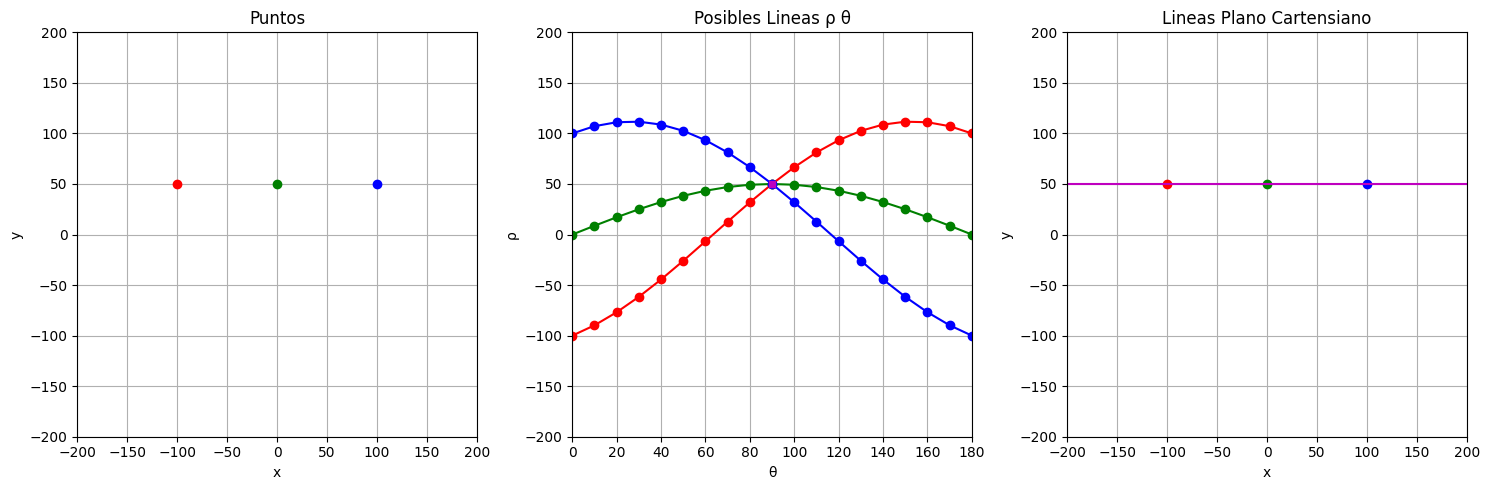

In [ ]:
#Un punto cualquiera en el plano cartesiano
PUNTOS = np.array([[-100,50],[0,50],[100,50]])

#Calculamos alguno thetas y rhos
thetas = np.arange(0,181,10)
radThetas = np.radians(thetas)

rhos = np.outer(PUNTOS[:,0], np.cos(radThetas)) + np.outer(PUNTOS[:,1], np.sin(radThetas))

fig, axs = plt.subplots(1,3, figsize=(15, 5))

# Plot Punto
axs[0].plot(PUNTOS[0,0],PUNTOS[0,1], marker='o', color='r')
axs[0].plot(PUNTOS[1,0],PUNTOS[1,1], marker='o', color='g')
axs[0].plot(PUNTOS[2,0],PUNTOS[2,1], marker='o', color='b')

axs[0].set_xlim(-200, 200)
axs[0].set_ylim(-200, 200)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title(f'Puntos')

# Plot Plano rho theta
axs[1].plot(thetas, rhos[0,:], marker='o', color="r")
axs[1].plot(thetas, rhos[1,:], marker='o', color="g")
axs[1].plot(thetas, rhos[2,:], marker='o', color="b")

axs[1].plot(90, 50, marker='s', markersize=5, color="m")

axs[1].set_xlim(0, 180)
axs[1].set_ylim(-200, 200)
axs[1].grid(True)
axs[1].set_xlabel('θ')
axs[1].set_ylabel('ρ')
axs[1].set_title('Posibles Lineas ρ θ')

# Plot linea
axs[2].plot(PUNTOS[0,0],PUNTOS[0,1], marker='o', color='r')
axs[2].plot(PUNTOS[1,0],PUNTOS[1,1], marker='o', color='g')
axs[2].plot(PUNTOS[2,0],PUNTOS[2,1], marker='o', color='b')

axs[2].axhline(50, color='m')

axs[2].set_xlim(-200, 200)
axs[2].set_ylim(-200, 200)
axs[2].grid(True)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Lineas Plano Cartensiano')

plt.tight_layout()
plt.show()

Utilizando esta propiedad, pordremos utilizar la transformada de Hough para detectar lineas. La idea consistira en pasar por cada punto de la imagen, calcular cada una de sus posibles lineas y luego quedarnos con las lineas de mayor numero de 'votos'.

Como hay infinitas lineas por cada punto, tendremos que discretizar el plano rho, theta en bins.

### ***Ejercicio***: Implementar el Detector de Lineas con Transformada de Hough

Dada una imagen ya binarizada, devolver todos los pares *(theta, rho)* que tengan al menos **75%** de los votos que el participante con mayor votos y *sobrevivan* a la *supresion de no maximo*. **El resultado debe ser una matriz, donde la primera columna sera rho y la segunda theta.**

In [ ]:
# Dado un theta en radianes, un rho, ax y un color, plotea en ax la linea descrita por rho y theta
def plotHoughLine(rho, theta, ax, color):

  cosTheta = np.cos(theta)
  sinTheta = np.sin(theta)

  x0 = cosTheta * rho
  y0 = sinTheta * rho

  # Verificamos que la linea no sea vertical
  # Si no lo es, calculamos su pendiente
  if np.isclose(theta, 0):
      pendiente = np.inf  # vertical line
  else:
      pendiente = -cosTheta / sinTheta

  if np.isinf(pendiente):
      # linea vertical
      ax.axvline(x=x0, color=color)
  else:
      ax.axline((x0, y0), slope=pendiente, color=color)


In [ ]:
def transformadaHough(img):
  # Creamos un acumulador con los posibles thetas y rhos
  theta = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
  offset = int(np.ceil(np.sqrt(img.shape[0] * img.shape[0] + img.shape[1] * img.shape[1])))
  max_distance = int(2 * offset + 1)

  accum = np.zeros((max_distance, theta.shape[0]), dtype=np.uint64)

  puntos = np.nonzero(img)
  puntos = np.column_stack(puntos)

  for y,x in puntos:
    for i in range(len(theta)):
      rho = x * np.cos(theta[i]) + y * np.sin(theta[i])
      rho_indice = int(round(rho + offset))
      accum[rho_indice, i] += 1

  maximo_votos = accum.max()
  umbral = maximo_votos * 0.75


  rho_indices, theta_indices = np.where(accum >= umbral)
  rhos = rho_indices - offset
  thetas = theta[theta_indices]

  return np.column_stack((rhos, thetas))

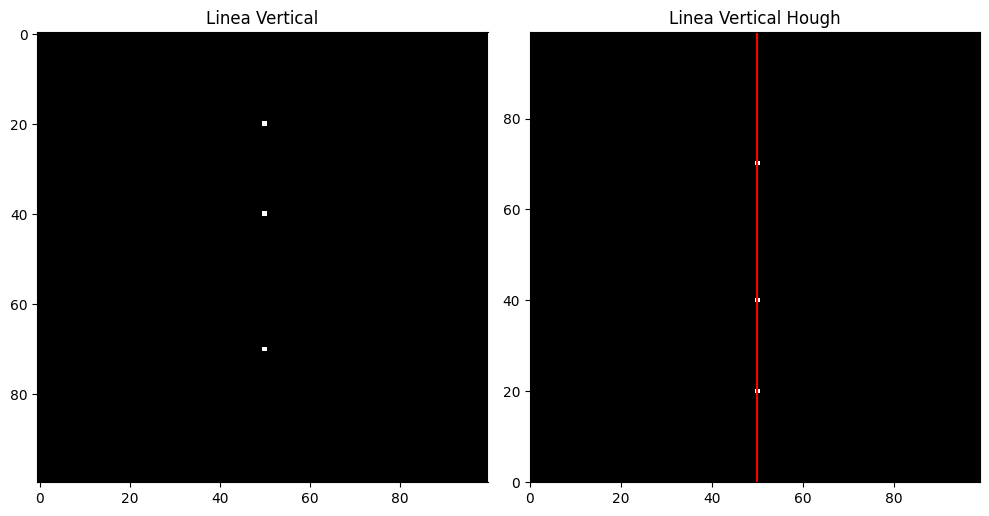

In [ ]:
imagen = np.zeros((100,100))

imagen[20][50] = 1
imagen[40][50] = 1
imagen[70][50] = 1

parametrosLineas = transformadaHough(imagen)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title(f'Linea Vertical')

axs[1].imshow(imagen, cmap='gray')
axs[1].set_title(f'Linea Vertical Hough')
axs[1].set_xlim(0,99)
axs[1].set_ylim(0,99)

for i in range(parametrosLineas.shape[0]):
  plotHoughLine(parametrosLineas[i][0],parametrosLineas[i][1], axs[1], 'r')

plt.tight_layout()
plt.show()

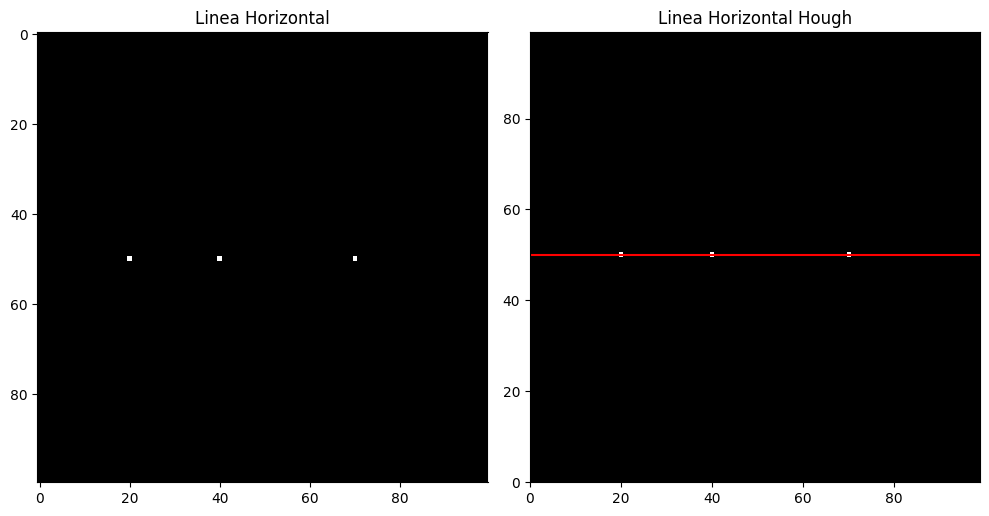

In [ ]:
imagen = np.zeros((100,100))

imagen[50][20] = 1
imagen[50][40] = 1
imagen[50][70] = 1

parametrosLineas = transformadaHough(imagen)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title(f'Linea Horizontal')

axs[1].imshow(imagen, cmap='gray')
axs[1].set_title(f'Linea Horizontal Hough')
axs[1].set_xlim(0,99)
axs[1].set_ylim(0,99)

for i in range(parametrosLineas.shape[0]):
  plotHoughLine(parametrosLineas[i][0],parametrosLineas[i][1], axs[1], 'r')

plt.tight_layout()
plt.show()

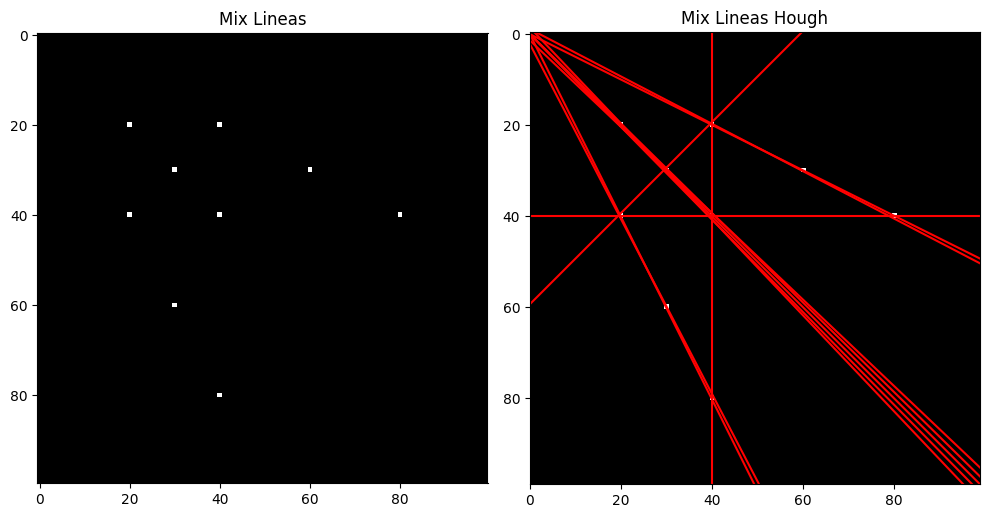

In [ ]:
imagen = np.zeros((100,100))

imagen[20][40] = 1
imagen[30][60] = 1
imagen[40][80] = 1

imagen[40][20] = 1
imagen[60][30] = 1
imagen[80][40] = 1

imagen[20][20] = 1
imagen[30][30] = 1
imagen[40][40] = 1

parametrosLineas = transformadaHough(imagen)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title(f'Mix Lineas')
axs[1].set_xlim(0,99)

axs[1].imshow(imagen, cmap='gray')
axs[1].set_title(f'Mix Lineas Hough')
axs[1].set_xlim(0,99)
axs[1].set_ylim(99)

for i in range(parametrosLineas.shape[0]):
  plotHoughLine(parametrosLineas[i][0],parametrosLineas[i][1], axs[1], 'r')

plt.tight_layout()
plt.show()

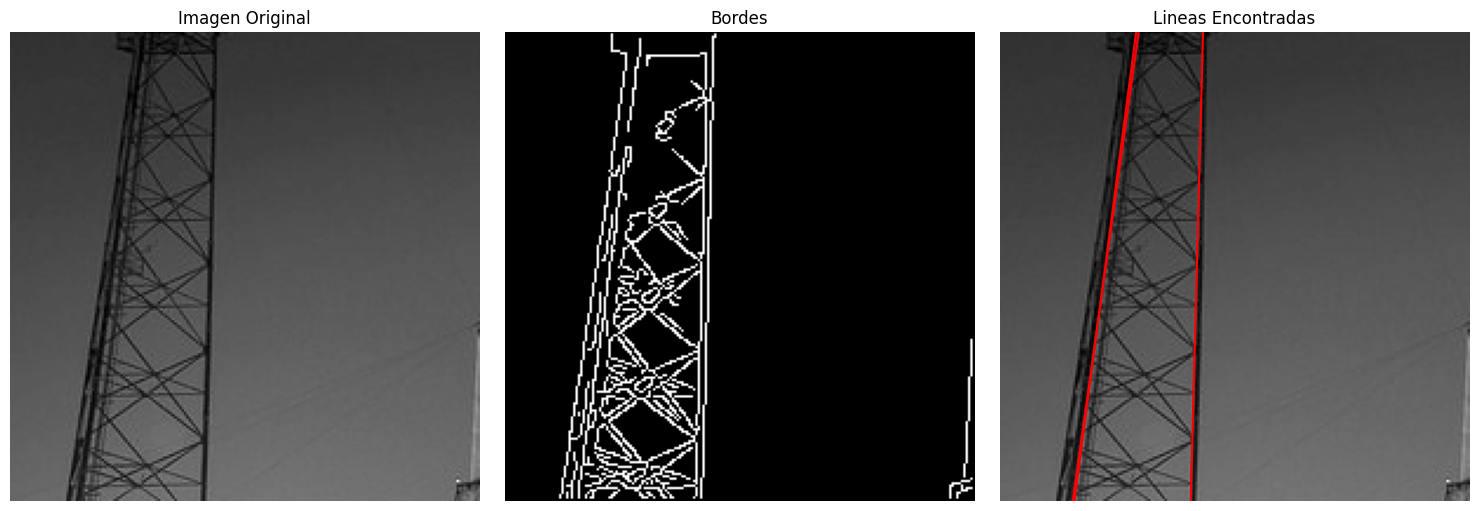

In [ ]:
from skimage import data, util, color
from skimage.feature import canny

# Abrimos una imagen y encontramos sus bordes con Canny
imagenBlancoNegro = util.img_as_float32((color.rgb2gray(data.rocket())))[:200,0:200]

bordes = canny(imagenBlancoNegro)

# Encotramos las lineas principales
parametrosLineas = transformadaHough(bordes)

fig, axs = plt.subplots(1,3, figsize=(15, 5))

axs[0].imshow(imagenBlancoNegro, cmap='gray')
axs[0].set_title(f'Imagen Original')
axs[0].axis(False)

axs[1].imshow(bordes, cmap='gray')
axs[1].set_title(f'Bordes')
axs[1].axis(False)

axs[2].imshow(imagenBlancoNegro, cmap='gray')
axs[2].set_title(f'Lineas Encontradas')
axs[2].axis(False)

for i in range(parametrosLineas.shape[0]):
  plotHoughLine(parametrosLineas[i][0],parametrosLineas[i][1], axs[2], 'r')

plt.tight_layout()
plt.show()


## ***CHEKPOINT 1 !!!!***

## **LBP**

La tecnica de **Local Binary Pattern** nos permite crear de forma simple un descriptor de la forma de una textura, mas que nada de como los pixeles se relacionan entre si. Para esto, define a cada pixel segun la comparacion de sus valores con su vecindad, dandole un identificador unico a cada patron. Luego, para ver la fuerza de cada patron, contabiliza las apariciones de cada uno de ellos.









Para empezar compara la vecindad de un pixel para darle un identificador. Supongamos que tenemos el pixel $P$ con su vecindad

$$\begin{pmatrix} 100 & 23 & 59 \\ 34 & \textbf{89} & 2 \\ 97 & 140 & 4\end{pmatrix} $$

LBP primero le asigna el valor 0 o 1 a los vecinos de un pixel segun si su valor es mayor que el pixel central, entonces

$$\begin{pmatrix} 1 & 0 & 1 \\ 0 & \textbf{89} & 0 \\ 1 & 1 & 0\end{pmatrix} $$

Con esto valores construiremos el id unico para este patron, tomando los digitos como una tira de 8 bits. Se empezara a contar desde la esquina superior izquierda en sentido horario. El id para el patron de $P$ sera

$$P_{id} = 1 + 4 + 32 + 64 = 101$$

Haremos esto para cada uno de los pixeles y luego contaremos cuantas apariciones hubo de cada patron.

### ***Ejercicio***: Dado una imagen, devolver su histograma LBP.

In [ ]:
def pltLBP(img, nombre, axs, fila):
  lbpHist = lbpHistograma(img)

  axs[fila][0].imshow(img, cmap='gray')
  axs[fila][0].axis(False)
  axs[fila][0].set_title(nombre)

  axs[fila][1].bar(range(256), lbpHist, width=1, edgecolor="black")
  axs[fila][1].set_title(f"LBP {nombre}")


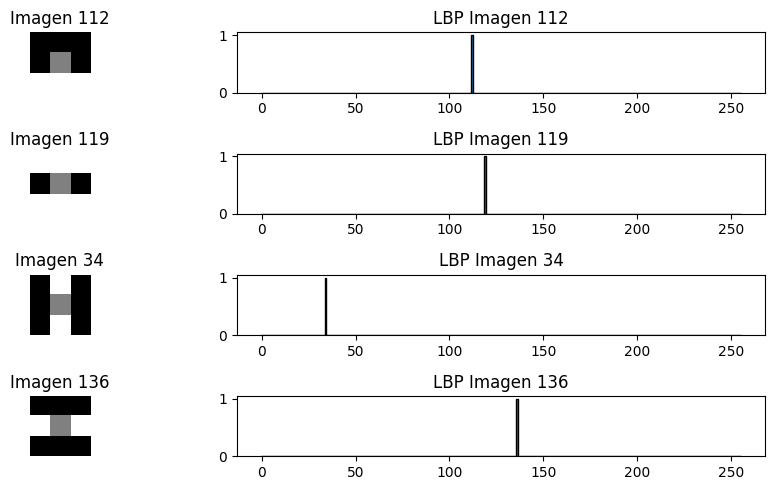

In [ ]:
# Recuerden ignorar toda la primera y ultima fila y columna, ya que no tienen los vecinos necesarios.
def lbpHistograma(img):

  hist = np.zeros(256)
  ancho, largo = img.shape

  for i in range(1,ancho-1):
    for j in range(1, largo-1):

      identificador = 0
      valor_centro = img[i,j]

      #Itero por los vecinos
      k = 0
      vecinos = np.array([[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]])
      for vecino in vecinos:
        if img[i+vecino[0],j+vecino[1]] >= valor_centro:
          identificador += 2 ** k
        k += 1

      hist[identificador] += 1

  return hist

lbp112 = np.asarray([[0,0,0],[0,1,0],[2,2,2]])
lbp119 = np.asarray([[2,2,2],[0,1,0],[2,2,2]])
lbp34 = np.asarray([[0,2,0],[0,1,0],[0,2,0]])
lbp136 = np.asarray([[0,0,0],[2,1,2],[0,0,0]])

fig,axs = plt.subplots(4,2, figsize=(10,5))

pltLBP(lbp112, "Imagen 112", axs, 0)
pltLBP(lbp119, "Imagen 119", axs, 1)
pltLBP(lbp34, "Imagen 34", axs, 2)
pltLBP(lbp136, "Imagen 136", axs, 3)

plt.tight_layout()
plt.show()

Al crear descriptores, es usual dividir la imagen en muestras segun las dimensiones de una ventana, de esta forma tenemos informacion local de cada muestra que no perdemos al utilizar un histograma.

In [ ]:
# Pueden ignorar la parte de la imagen que no sea multiplo de las dimensiones de la ventana
def lbpVentanas(img, ventanaX, ventanaY):
  histogramas = []
  for yInicio in range(0,img.shape[0],ventanaY):
    for xInicio in range(0,img.shape[1],ventanaX):
      if (xInicio + ventanaX >= img.shape[1]): continue
      if (yInicio + ventanaY >= img.shape[0]): continue
      muestra = img[yInicio:yInicio + ventanaY, xInicio:xInicio + ventanaX]
      histogramas.append(lbpHistograma(muestra))
  return histogramas

In [ ]:
def pltScatterLbp(imagen, val1, val2, nombre,ax,fila):
  histogramas = lbpVentanas(imagen, 20, 40)

  # Ploteamos la imagen original
  ax[fila][0].imshow(imagen, cmap='gray', clim=(0,1))
  ax[fila][0].axis(False)
  ax[fila][0].set_title(nombre)

  # Ploteamos el histograma de la muestra en el centro de la imagen
  muestraMitad = histogramas[len(histogramas)//2]
  axs[fila][1].bar(range(256), muestraMitad, width=1, edgecolor="black")
  axs[fila][1].set_title(f"LBP {nombre} | Muestra {len(histogramas)//2}")

  # Ploteamos la relacion entre dos patrones en cada muestra de la textura
  for histograma in histogramas:
    ax[fila][2].scatter(histograma[val1], histograma[val2], marker='+')

  ax[fila][2].set_title(f"Scatter {nombre} (P1 = {val1} P2 = {val2})")




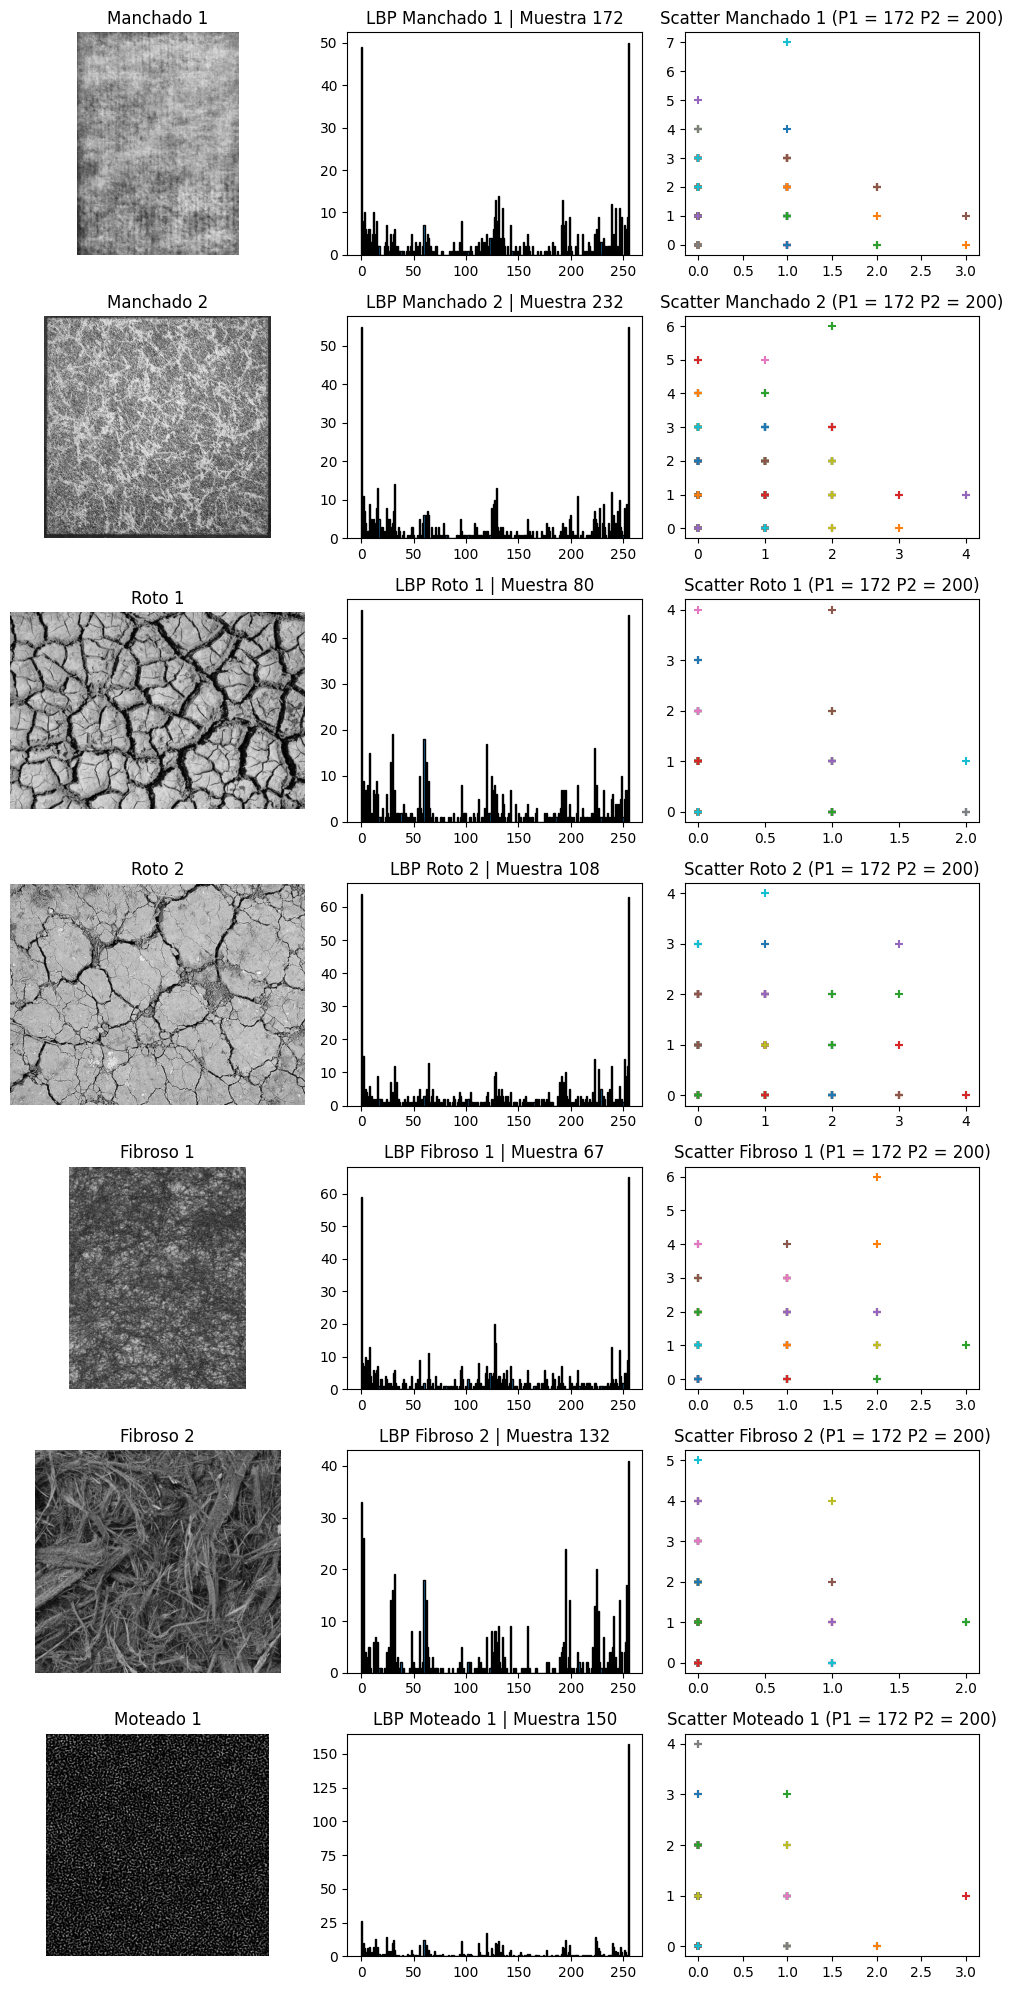

In [ ]:
from skimage import io

# Veamos como 2 valores del histograma describen a las diferentes texturas

# Modifiquen estos valores para observar como cambia la forma del Scatter Plot
PATRON_1 = 172
PATRON_2 = 200

machado1 = io.imread("imagenes/blotchy_0009.jpg", as_gray=True)
machado2 = io.imread("imagenes/blotchy_0017.jpg", as_gray=True)

roto1 = io.imread("imagenes/cracked_0004.jpg", as_gray=True)
roto2 = io.imread("imagenes/cracked_0046.jpg", as_gray=True)

fibroso1 = io.imread("imagenes/fibrous_0083.jpg", as_gray=True)
fibroso2 = io.imread("imagenes/fibrous_0095.jpg", as_gray=True)

moteado1 = io.imread("imagenes/flecked_0050.jpg", as_gray=True)


fig, axs = plt.subplots(7,3, figsize=(10,20))

# Por cada histograma, agregaremos un punto
# donde el eje x sera la cantidad del patron PATRON_1
# donde el eje Y sera la cantidad del patron PATRON_2
pltScatterLbp(machado1,PATRON_1,PATRON_2,"Manchado 1",axs,0)
pltScatterLbp(machado2,PATRON_1,PATRON_2,"Manchado 2",axs,1)
pltScatterLbp(roto1,PATRON_1,PATRON_2,"Roto 1",axs,2)
pltScatterLbp(roto2,PATRON_1,PATRON_2,"Roto 2",axs,3)
pltScatterLbp(fibroso1,PATRON_1,PATRON_2,"Fibroso 1",axs,4)
pltScatterLbp(fibroso2,PATRON_1,PATRON_2,"Fibroso 2",axs,5)
pltScatterLbp(moteado1,PATRON_1,PATRON_2,"Moteado 1",axs,6)

plt.tight_layout()
plt.show()


## ***CHECKPOINT 2 !!!!!***